In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.dates as mdates

In [4]:
#reading in csvs
unemployment = pd.read_csv("UNRATE.csv")
gdp = pd.read_csv("GDP.csv")
fedfunds = pd.read_csv("FEDFUNDS.csv")
# df4 = pd.read_csv("./data/FYFSD.csv")
realgdp = pd.read_csv("GDPREAL.csv")
debt = pd.read_csv("GFDEGDQ188S.csv")
# df7 = pd.read_csv("./data/INFLATIONCPI.csv")
quits = pd.read_csv("JTSQUR.csv")
cpi = pd.read_csv("MEDCPI.csv")
# df10 = pd.read_csv("./data/MORTGAGE30US.csv")

# df = unemployment.merge(gdp)
# df = df.merge(fedfunds)
# df = df.merge(df4)
#df = df.merge(realgdp)
#df = df.merge(debt)
# df = df.merge(df7)
#df = df.merge(quits)
#df = df.merge(cpi)
# df = df.merge(df10) 
unemployment.head

<bound method NDFrame.head of            DATE  UNRATE
0    1948-01-01     3.4
1    1948-02-01     3.8
2    1948-03-01     4.0
3    1948-04-01     3.9
4    1948-05-01     3.5
..          ...     ...
915  2024-04-01     3.9
916  2024-05-01     4.0
917  2024-06-01     4.1
918  2024-07-01     4.3
919  2024-08-01     4.2

[920 rows x 2 columns]>

In [5]:

# merging csvs
df = pd.merge(df, debt, how = "left", on = "DATE")
df = pd.merge(df, unemployment, how = "left", on = "DATE")
df = pd.merge(gdp, realgdp, how = "left", on = "DATE")
df = pd.merge(df, cpi, how = "left", on = "DATE")
df = pd.read_csv("econData.csv")
df = df.set_axis(['DATE', 'Unemployment','GDP', 'Fed Funds', 'Real GDP', 'Debt', 'Quits', 'CPI'], axis=1)
df["DATE"] = pd.to_datetime(df["DATE"])
df = pd.read_csv("econData.csv")
df.tail

<bound method NDFrame.tail of           DATE  UNRATE        GDP  FEDFUNDS   Real GDP       Debt  Quits  \
0   2001-01-01     4.2  10470.231      5.98  14183.120   55.14434    2.4   
1   2001-04-01     4.4  10599.000      4.80  14271.694   54.03165    2.4   
2   2001-07-01     4.6  10598.020      3.77  14214.516   54.79763    2.2   
3   2001-10-01     5.3  10660.465      2.49  14253.574   55.75216    2.1   
4   2002-01-01     5.7  10783.500      1.73  14372.785   55.69650    2.2   
..         ...     ...        ...       ...        ...        ...    ...   
89  2023-04-01     3.4  27453.815      4.83  22539.418  117.76969    2.3   
90  2023-07-01     3.5  27967.697      5.12  22780.933  118.59158    2.3   
91  2023-10-01     3.8  28296.967      5.33  22960.600  120.15950    2.3   
92  2024-01-01     3.7  28624.069      5.33  23053.545  120.83025    2.2   
93  2024-04-01     3.9  29016.714      5.33  23223.906  120.03990    2.2   

         CPI  
0   4.076478  
1   3.144633  
2   2.435041

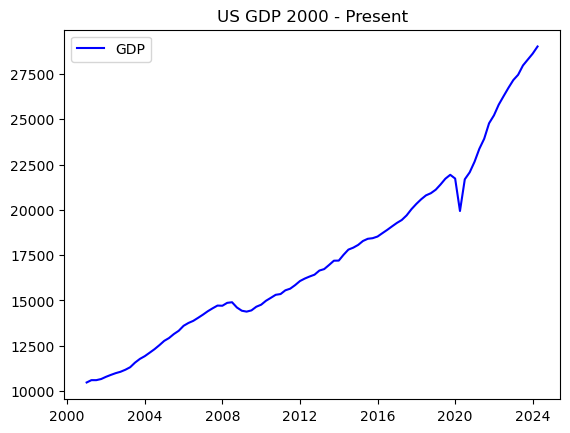

In [6]:
# plotting gdp data

df["DATE"] = pd.to_datetime(df["DATE"])
plt.plot('DATE', 'GDP', data=df, color = 'blue')
plt.title("US GDP 2000 - Present")
plt.legend(['GDP'])

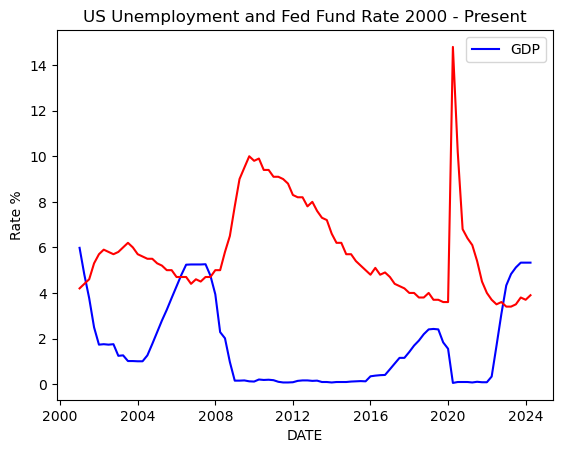

In [7]:
# plotting fed funds data 

df["DATE"] = pd.to_datetime(df["DATE"])
plt.plot('DATE', 'FEDFUNDS', data=df, color = 'blue')
plt.xlabel("DATE")
plt.ylabel("Rate %")
plt.plot('DATE', 'UNRATE', data=df, color = 'red')
plt.title("US Unemployment and Fed Fund Rate 2000 - Present")
plt.legend(['GDP'])

Text(0, 0.5, 'Quits')

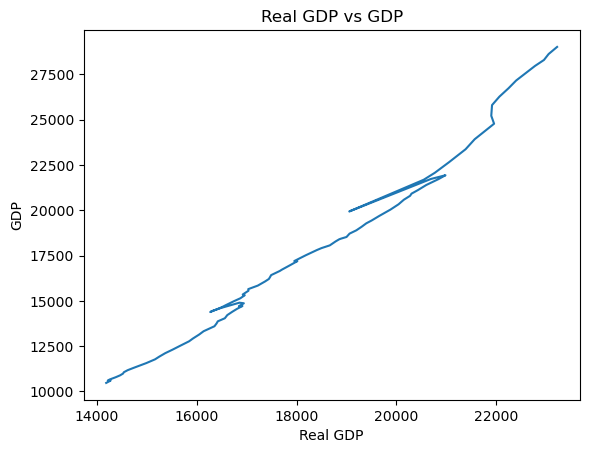

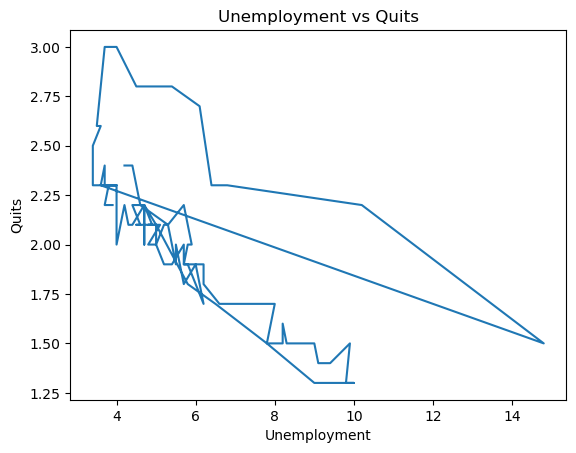

In [8]:
fig, ax = plt.subplots()
ax.plot(df["Real GDP"], df["GDP"])
ax.set_title('Real GDP vs GDP')
plt.xlabel("Real GDP")
plt.ylabel("GDP")

fig, ax = plt.subplots()
ax.plot(df["UNRATE"], df["Quits"])
ax.set_title('Unemployment vs Quits')
plt.xlabel("Unemployment")
plt.ylabel("Quits")

Text(0.5, 1.0, 'US Unemployment and Quite Rate 2000 - Present')

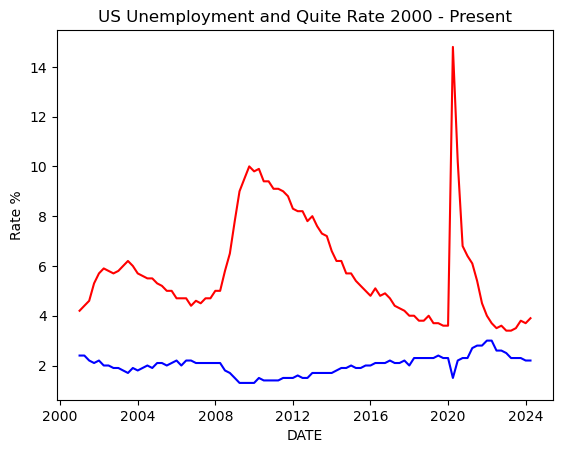

In [9]:
df["DATE"] = pd.to_datetime(df["DATE"])
plt.plot('DATE', 'Quits', data=df, color = 'blue')
plt.xlabel("DATE")
plt.ylabel("Rate %")
plt.plot('DATE', 'UNRATE', data=df, color = 'red')
plt.title("US Unemployment and Quite Rate 2000 - Present")

Text(0.5, 1.0, 'US Unemployment and Quite Rate 2000 - Present')

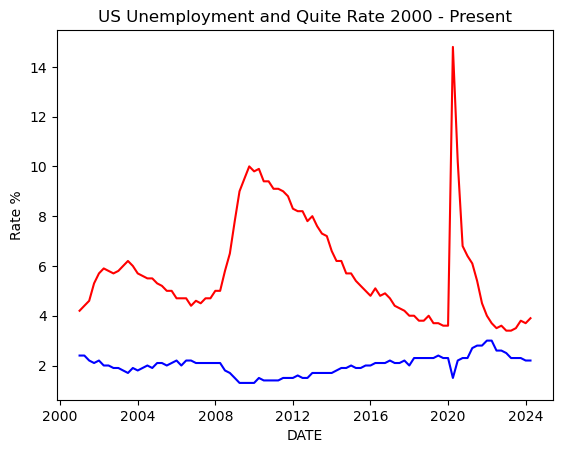

In [10]:
df["DATE"] = pd.to_datetime(df["DATE"])
plt.plot('DATE', 'Quits', data=df, color = 'blue')
plt.xlabel("DATE")
plt.ylabel("Rate %")
plt.plot('DATE', 'UNRATE', data=df, color = 'red')
plt.title("US Unemployment and Quite Rate 2000 - Present")

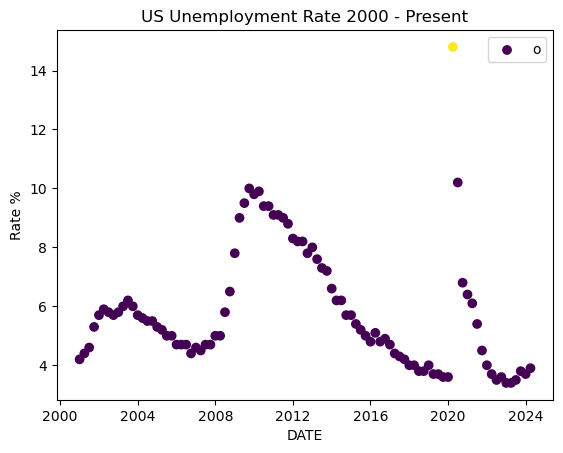

In [11]:
#finding outlier in unemployment rate data
from scipy import stats

z_scores = stats.zscore(df['UNRATE'])
df['z_score'] = abs(stats.zscore(df['UNRATE']))
outliers_unemployment = df[abs(z_scores) > 3]
z_scores1 = stats.zscore(df['Quits'])
outliers_quits = df[abs(z_scores1) > 3]

df['outlier'] = df['z_score'] > 3
df.head()


df["DATE"] = pd.to_datetime(df["DATE"])
plt.scatter('DATE', 'UNRATE', data=df, c = 'outlier')
            
plt.xlabel("DATE")
plt.ylabel("Rate %")
# plt.plot('DATE', 'Unemployment', data=df, color = df['outlier'])
plt.title("US Unemployment Rate 2000 - Present")
plt.legend('outlier')


In [12]:
#Linear regression with GDP and Debt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X = df[["GDP"]]
y = df["Debt"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

r2_score_val = r2_score(y_test, predictions)
print(r2_score_val)


0.8118193176380881


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


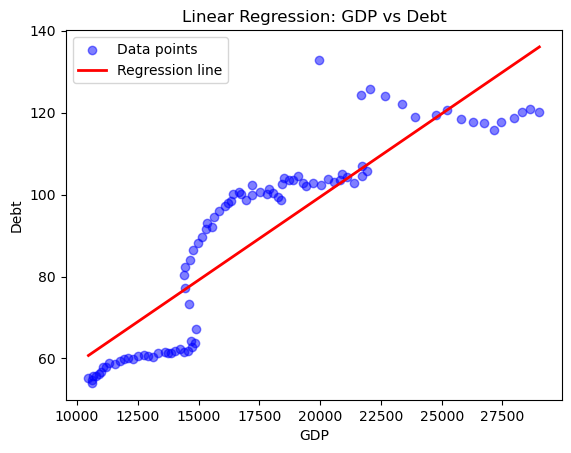

In [13]:
#Graphing linear regression
import matplotlib.pyplot as plt

plt.scatter(X, y, color='blue', alpha=0.5, label='Data points')

X_sorted = X.sort_values(by='GDP')
y_pred = model.predict(X_sorted.values.reshape(-1, 1))

plt.plot(X_sorted, y_pred, color='red', linewidth=2, label='Regression line')

plt.xlabel('GDP')
plt.ylabel('Debt')
plt.title('Linear Regression: GDP vs Debt')
plt.legend()

plt.show()

In [14]:
#Multiple Linear Regression  for Quit rate and Debt rate
predictors = df[["Debt", "Quits"]]
dependent = df["GDP"]
df['DATE_numeric'] = pd.to_datetime(df['DATE']).astype(int) / 10**9
predictors['DATE_numeric'] = df['DATE_numeric']

X_train, X_test, y_train, y_test = train_test_split(predictors, dependent, test_size=0.3, random_state=101)

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

r2_score_val = r2_score(y_test, predictions)
print(r2_score_val)

0.9716225796698323


/var/folders/pk/1dt5kljn7dx68_g9ck3yx6wm0000gn/T/ipykernel_6468/2103874978.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictors['DATE_numeric'] = df['DATE_numeric']


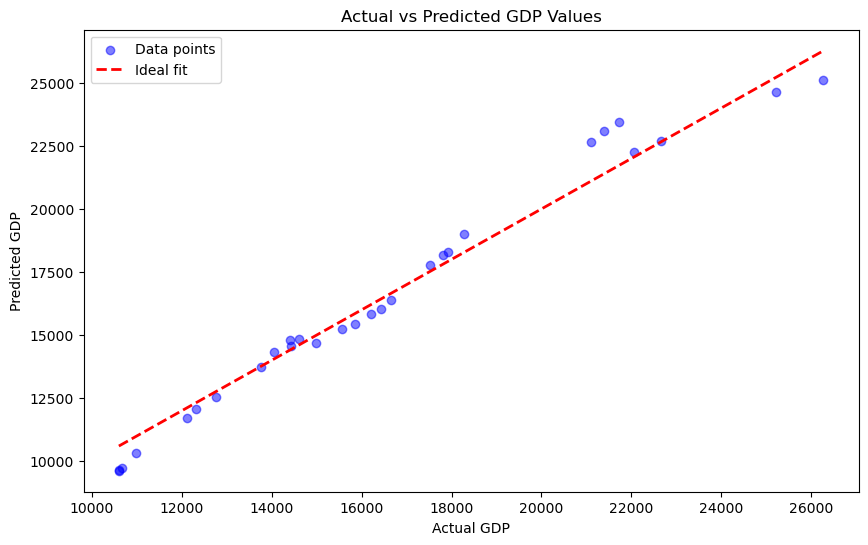

In [15]:
#graphing the multiple linear regression
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, color='blue', alpha=0.5, label='Data points')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal fit')

plt.xlabel('Actual GDP')
plt.ylabel('Predicted GDP')
plt.title('Actual vs Predicted GDP Values')
plt.legend()
plt.show()